<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Import Libraries <br>
    </p>
</div>


In [1]:
!pip install mplcursors

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential, layers, models
import matplotlib.pyplot as plt
import mplcursors
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings

warnings.filterwarnings('ignore')

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Evaluation Plotter
    </p>
</div>


In [3]:
def plot_plots(data):
    # Use a dark theme
    plt.style.use('dark_background')

    # Create figure and axes for 2 subplots in the same row
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot Loss on the first subplot
    ax1.plot(data['loss'], color='cyan', linewidth=2, label='Training Loss')
    ax1.plot(data['val_loss'], color='magenta', linewidth=2, label='Validation Loss')
    ax1.set_xlabel('Epochs', color='white')
    ax1.set_ylabel('Loss', color='white')
    ax1.set_title('Loss Over Epochs', color='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', fontsize=10)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax1, hover=True)  # Add interactivity

    # Plot Accuracy on the second subplot
    ax2.plot(data['accuracy'], color='lime', linewidth=2, label='Training Accuracy')
    ax2.plot(data['val_accuracy'], color='orange', linewidth=2, label='Validation Accuracy')
    ax2.set_xlabel('Epochs', color='white')
    ax2.set_ylabel('Accuracy', color='white')
    ax2.set_title('Accuracy Over Epochs', color='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.legend(loc='lower right', facecolor='black', edgecolor='white', fontsize=10)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax2, hover=True)  # Add interactivity

    # Show the plot
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Download Dataset from ==> <a href = "https://www.kaggle.com/datasets/arjuntejaswi/plant-village"> Kaggle </a><br>
    </p>
</div>


In [4]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Unzip Folder<br>
    </p>
</div>


In [5]:
# !kaggle datasets download -d arjuntejaswi/plant-village
# !unzip plant-village.zip -d plant_village

In [10]:
!unzip PotatoOriginal.zip -d PotatoOriginal

Archive:  PotatoOriginal.zip
   creating: PotatoOriginal/Potato/
   creating: PotatoOriginal/Potato/Potato___Early_blight/
  inflating: PotatoOriginal/Potato/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PotatoOriginal/Potato/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PotatoOriginal/Potato/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PotatoOriginal/Potato/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PotatoOriginal/Potato/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PotatoOriginal/Potato/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PotatoOriginal/Potato/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PotatoOriginal/Potato/Potato___Early_b

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Dataset Parameters<br>
    </p>
</div>


In [6]:
dataset_path = "/content/PotatoOriginal/Potato"
IMAGE_SIZE = 256
BATCH_SIZE = 32

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Load dataset<br>
    </p>
</div>


In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [11]:
class_name = dataset.class_names
class_counts = Counter()
for images, labels in dataset:
    class_counts.update(labels.numpy())
class_counts = {class_name[k]: v for k, v in class_counts.items()}
print("Class Counts:", class_counts)

Class Counts: {'Potato___Late_blight': 1000, 'Potato___Early_blight': 1000, 'Potato___healthy': 152}


In [12]:
class_names = dataset.class_names

In [13]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 2 0 0 0 0 1 1 0]


<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        visualize Image from Each Classes<br>
    </p>
</div>


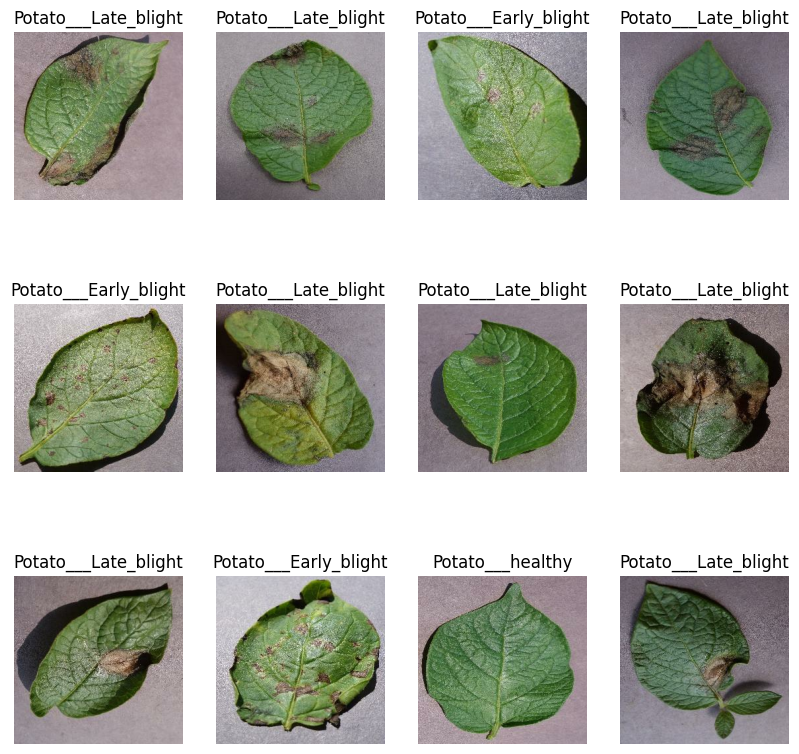

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Data splitting
    </p>
</div>


### <b><i> Splitting Criteria:
        - Train data size: 80%
        - Test data size: 10%
        - Validation data size: 10%
</b></i>

In [16]:
for image_batch, labels_batch in dataset:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [17]:
len(dataset)

68

In [18]:
int(len(dataset) * .8)

54

In [19]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)

In [20]:
len(train_ds), len(test_ds)

(54, 14)

In [21]:
int(len(dataset) * .1)

6

In [26]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [27]:
test_ds = test_ds.skip(6)
len(test_ds)

2

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Data splitting function
    </p>
</div>


In [28]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Split dataset
    </p>
</div>


In [29]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [30]:
len(train_ds), len(test_ds), len(val_ds)

(54, 8, 6)

#### <b><i>Cache, Shuffle, and Prefetch the Dataset

In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
len(train_ds), len(test_ds), len(val_ds)

(54, 8, 6)

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Building the Model
    </p>
</div>



### <b><i> Creating a Layer for Resizing and Normalization

<p>
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model. </p>

<p>
You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it.
</p>

In [33]:
resize_and_rescale = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

### <b><i> Data Augmentation

  - <b>Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [34]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

- <b>Applying Data Augmentation, Rescaling to Data

In [35]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Model Architecture
    </p>
</div>

## <b><i><strong> Define model

  - <b>We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [38]:
model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), batch_size=BATCH_SIZE),

    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Compiling & Train the Model
    </p>
</div>

1. We use <strong>Adam</strong> Optimizer, <strong>SparseCategoricalCrossentropy</strong> for losses, <strong>accuracy</strong> as a metric

In [41]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 432ms/step - accuracy: 0.4158 - loss: 2.4752 - val_accuracy: 0.5000 - val_loss: 0.8347
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.5853 - loss: 0.8183 - val_accuracy: 0.7708 - val_loss: 0.5831
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 355ms/step - accuracy: 0.7886 - loss: 0.4908 - val_accuracy: 0.8958 - val_loss: 0.2696
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.8931 - loss: 0.2771 - val_accuracy: 0.8177 - val_loss: 0.3358
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.8820 - loss: 0.2783 - val_accuracy: 0.8958 - val_loss: 0.3769
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 344ms/step - accuracy: 0.8959 - loss: 0.2476 - val_accuracy: 0.9635 - val_loss: 0.1095
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 329ms/step - accuracy: 0.9318 - loss: 0.1619 - val_accuracy: 0.9792 - val_loss: 0.0741
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 350ms/step - accuracy: 0.9406 - loss: 0.1542 - val_accu

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Evaluating Model Performance (Loss and Accuracy)
    </p>
</div>

In [43]:
import pandas as pd
result_adam = pd.DataFrame(history.history)
result_adam.tail(5)

accuracy      loss  val_accuracy  val_loss
45  0.983218  0.045943      0.984375  0.026226
46  0.992477  0.023442      1.000000  0.004074
47  0.993634  0.017302      0.994792  0.012365
48  0.985532  0.044479      0.994792  0.012903
49  0.987847  0.033757      1.000000  0.001885

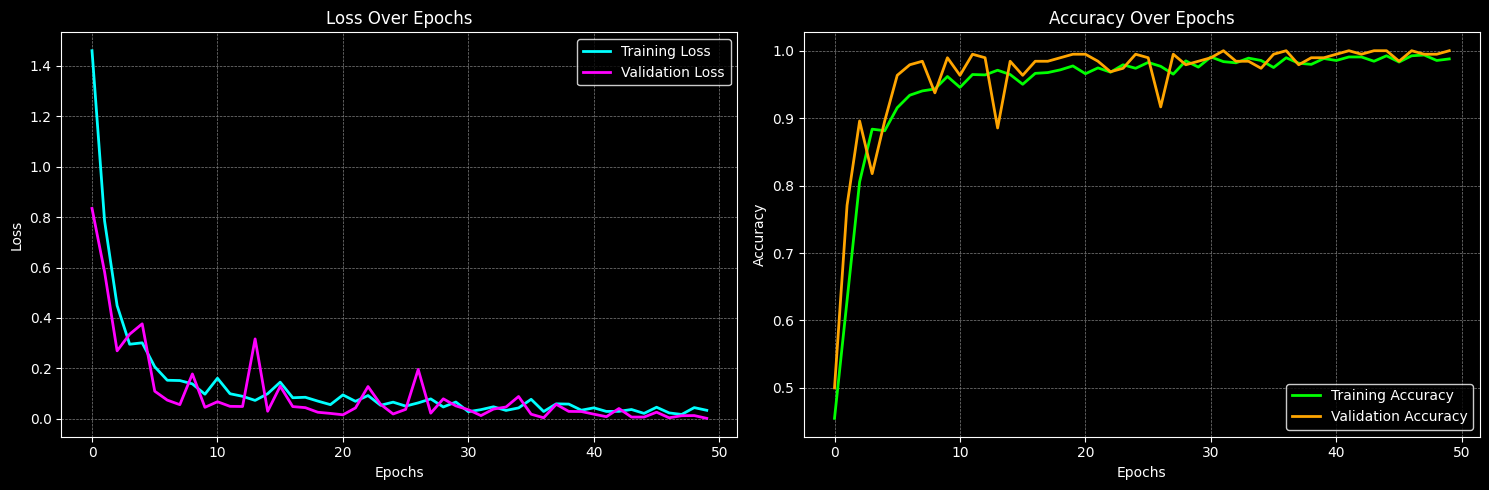

In [44]:
plot_plots(result_adam)

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Evaluating Model Performance on Test Data
    </p>
</div>

- <p><strong> We have already trained the model using RMSprop, achieving 97% accuracy on both the test and validation data and Adam got 98%.

In [45]:
evaluation = model.evaluate(test_ds)
print(f'Test Accuracy: {evaluation[1] * 100:.2f}%')

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0036
Test Accuracy: 100.00%


### <i><b> Run prediction on a sample image

First image to predict
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted label: Potato___Late_blight


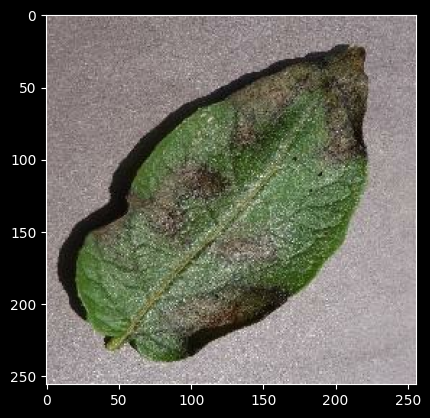

In [60]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

### <i><b> Write a function for inference

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### <b><i> Now run inference on few sample images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


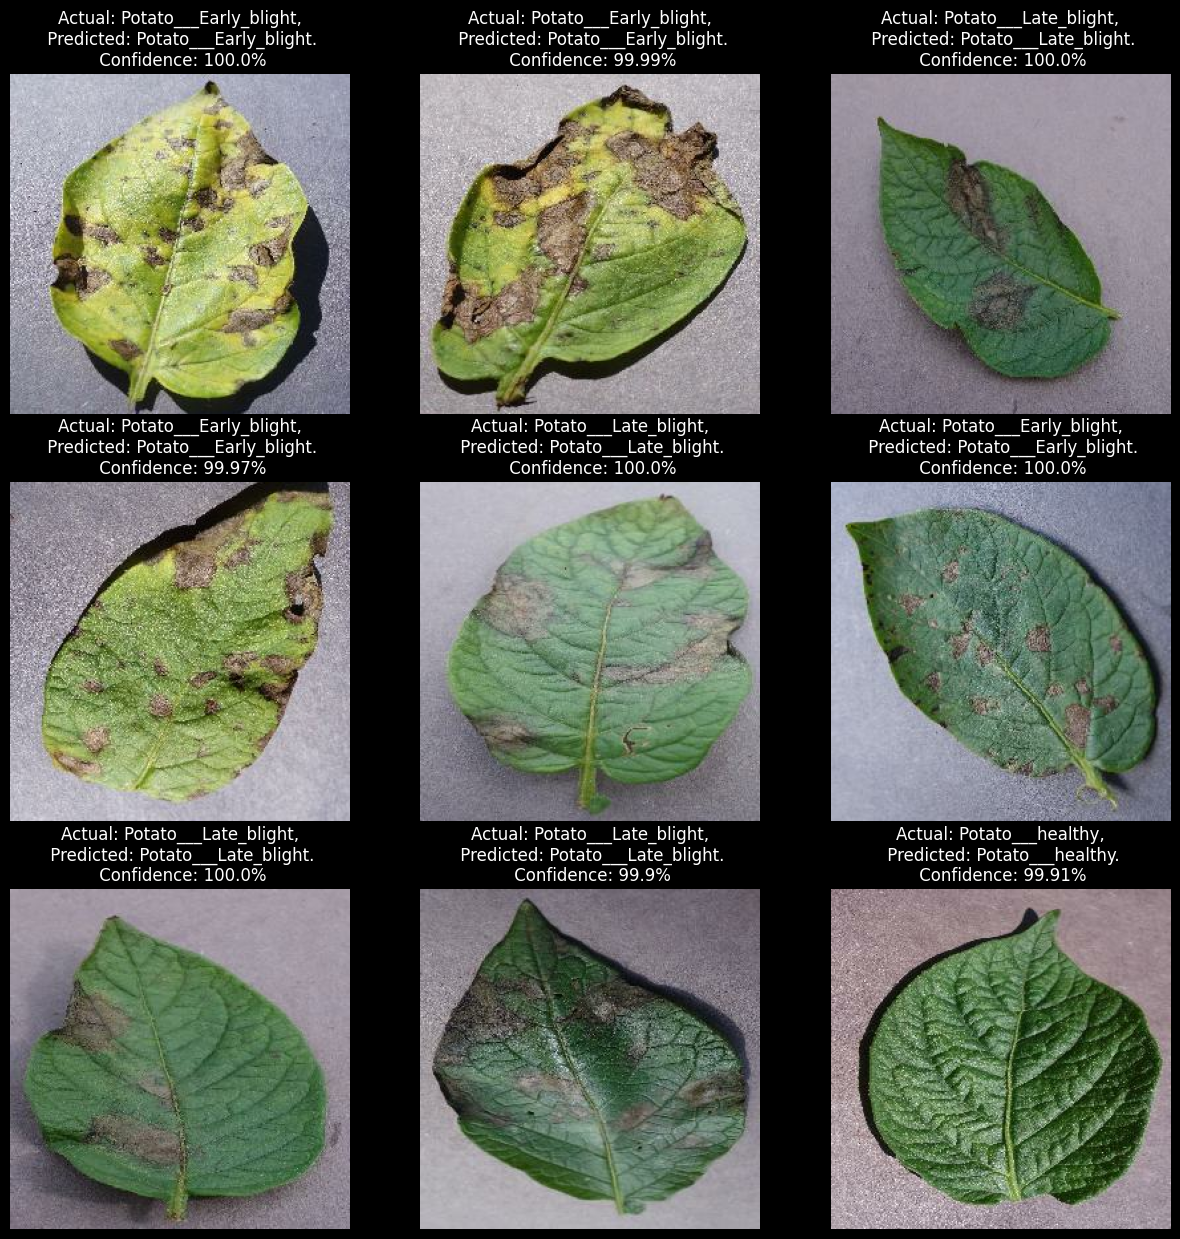

In [64]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

### <b><i><strong> Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


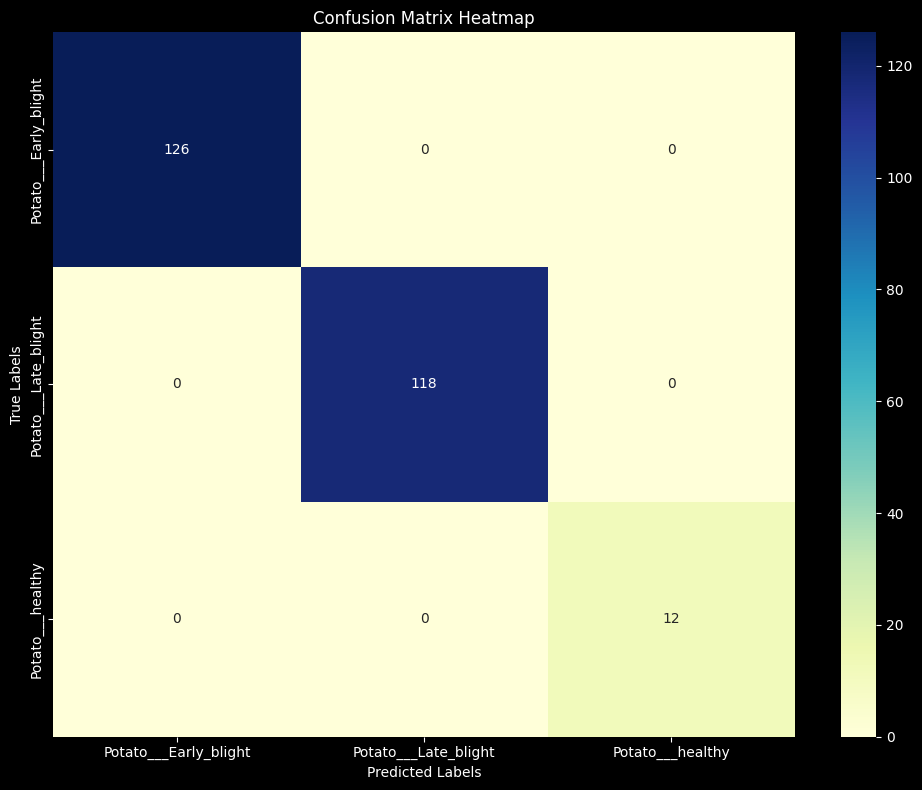

In [50]:
import seaborn as sns

true_labels = []
predicted_labels = []
predicted_probs = []

for images, labels in test_ds:
    preds = model.predict(images)
    predicted_probs.extend(preds)
    predicted_labels.extend(np.argmax(preds, axis=1))
    true_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

### <i><b>  Classification Report

In [51]:
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

                       precision    recall  f1-score   support

Potato___Early_blight       1.00      1.00      1.00       126
 Potato___Late_blight       1.00      1.00      1.00       118
     Potato___healthy       1.00      1.00      1.00        12

             accuracy                           1.00       256
            macro avg       1.00      1.00      1.00       256
         weighted avg       1.00      1.00      1.00       256



<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b);
              color: #fff;
              font-size: 1.8em;
              font-family: 'Helvetica', sans-serif;
              text-align: center;
              border-radius: 15px;
              border: 3px solid #ff7e5f;
              display: inline-block;
              padding: 15px 25px;
              margin: 20px auto;
              line-height: 1.5;
              font-weight: bold;
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
              text-transform: uppercase;
              letter-spacing: 2px;">
        Save Model
    </p>
</div>

In [52]:
model.save('desease_classifier_v3.h5')

In [53]:
load_model = tf.keras.models.load_model("/content/desease_classifier_v3.h5")